In [2]:
import linearmodels as lm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [3]:
finaldf = pd.read_csv("./data/finaldf.csv")
finaldf.TEAM = pd.Categorical(finaldf.TEAM)

teams = pd.Categorical(finaldf.TEAM).categories
seasons = finaldf.Season.unique()

finaldf = finaldf.set_index(["TEAM", "Season"])

# Descriptive

C:\Users\bhara\AppData\Local\Temp\ipykernel_3996\2722147956.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  finaldf.W.groupby("TEAM").mean().plot(kind = "bar", ylim = [0, 82])


<Axes: xlabel='TEAM'>

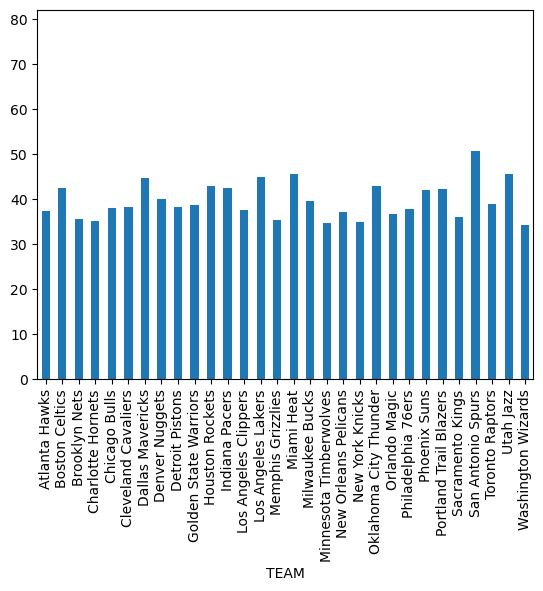

In [4]:
finaldf.W.groupby("TEAM").mean().plot(kind = "bar", ylim = [0, 82])

<Axes: xlabel='Season'>

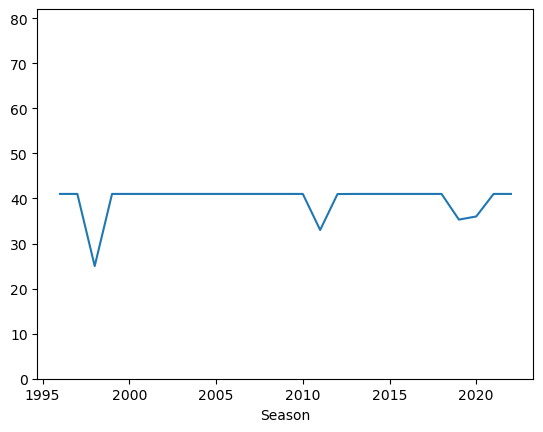

In [5]:
finaldf.W.groupby("Season").mean().plot(ylim=[0, 82])

In [6]:
finaldf = finaldf.dropna()

# Pooled OLS

In [7]:
regMod = lm.PanelOLS(finaldf.dropna()["W"], finaldf.dropna().drop(["W", "Coach"], axis = 1)).fit(cov_type = "robust")

c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:684: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:684: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

In [8]:
def sig_check(pval):
    if pval < 0.01:
        return("***")
    if pval < 0.025:
        return("**")
    if pval< 0.05:
        return("*")
    return ""

def outReg(regMod):
    regInfo = pd.DataFrame({"R^2 Between": regMod.corr_squared_between.round(2), "R^2 Within": regMod.corr_squared_within.round(2), "R^2 Overall": regMod.corr_squared_overall.round(2), "N": regMod.nobs}, index = ["Coefficients"]).T

    outdf = pd.DataFrame([regMod.params]).T.round(2)
    outdf["parameter"] = [f"{param}" + sig_check(pval) + f"\n({std_error:.2f})" for param, pval, std_error in zip(outdf.parameter.values, regMod.pvalues.values, regMod.std_errors)]
    outdf = outdf.rename({"parameter": "Coefficients"}, axis = 1)
    outdf = outdf.rename_axis("W", axis = 1)
    outdf = pd.concat([outdf, regInfo])

    return outdf

# Coach Effects

In [9]:
import matplotlib.pyplot as plt

c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:684: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:684: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
c:\Users\bhara\miniconda3\envs\py311\Lib\site-packages\linearmodels\panel\data.py:644: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

<Axes: >

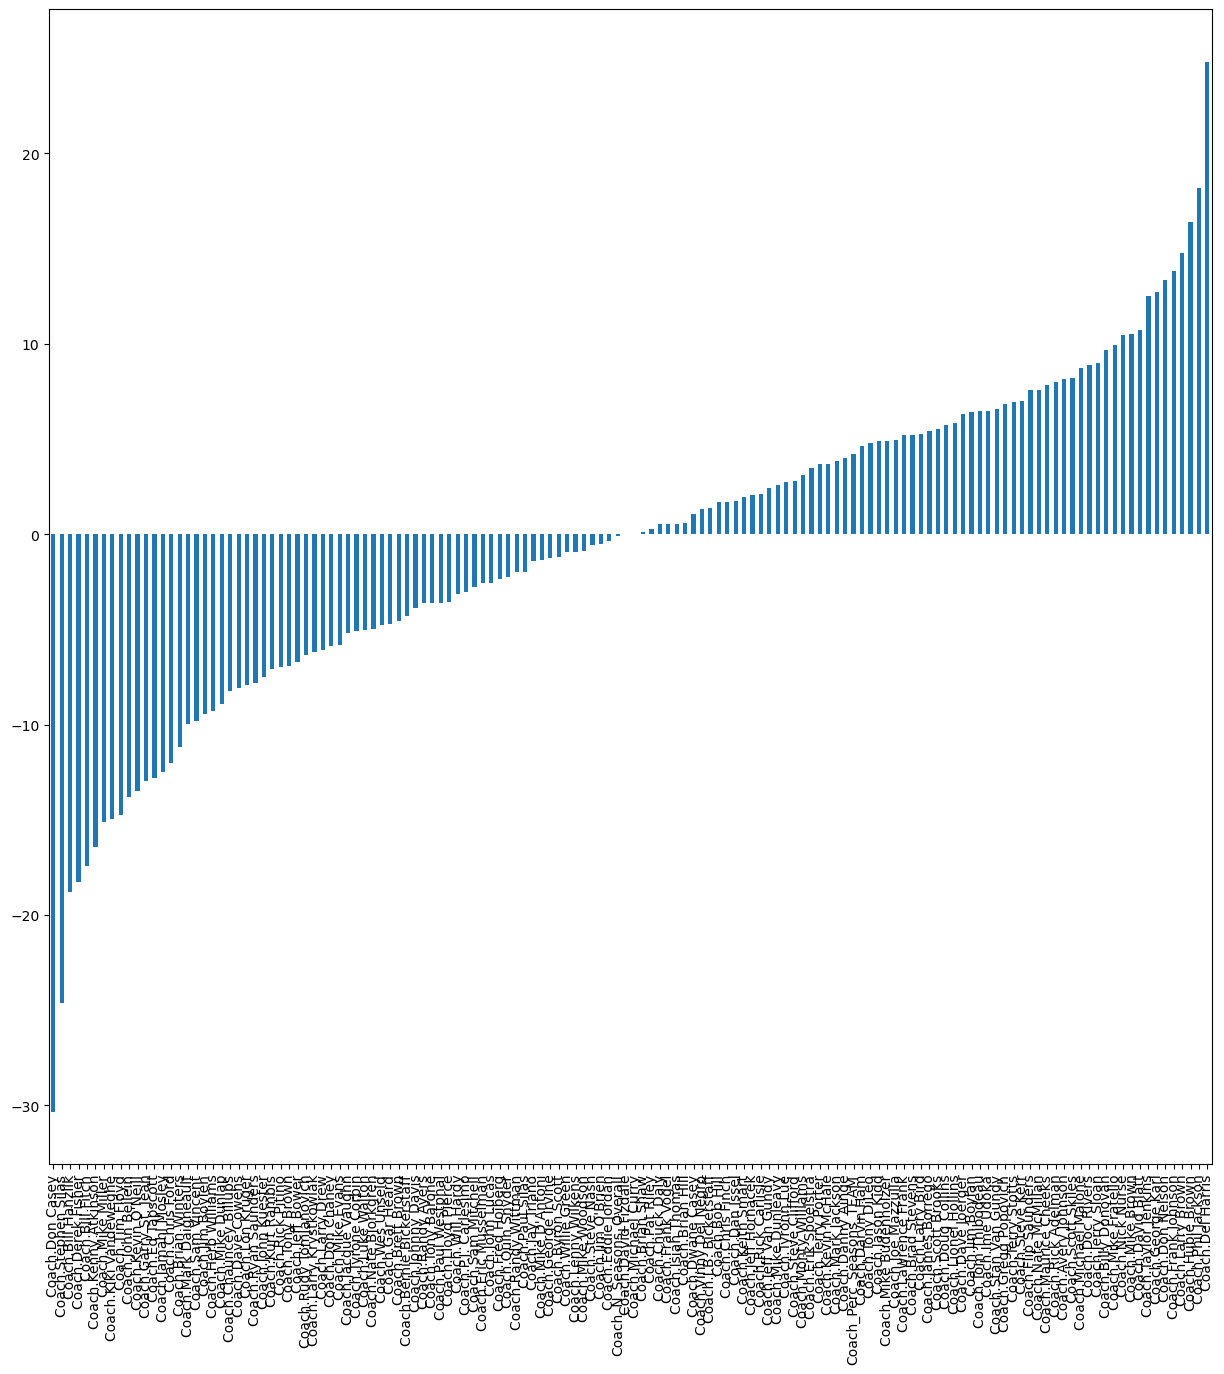

In [11]:
y = finaldf.W
X = finaldf.drop("W", axis = 1)

regMod = lm.PanelOLS(y, X).fit(cov_type = "clustered")
coachFE = pd.concat([regMod.params[12:], regMod.std_errors[12:], regMod.pvalues[12:]], axis = 1)

fig = plt.figure(figsize = (15, 15))
ax = fig.gca()

coachFE.sort_values("parameter")["parameter"].plot(kind = "bar", ax = ax)